In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_train_path = '/home/nata-brain/Documents/tcc/web-eye-tracker/public/training/1685126241.2630084natanael/train_data.csv'
dataset_session_path = '/home/nata-brain/Documents/tcc/web-eye-tracker/public/sessions/1685126241.2630084natanael/session_data.csv'

raw_dataset = pd.read_csv(dataset_train_path)
session_dataset = pd.read_csv(dataset_session_path)
dataset_t = raw_dataset
dataset_s = session_dataset.drop(['timestamp'], axis = 1)


In [3]:
px.line(session_dataset, y=["left_iris_x", "left_iris_y", "right_iris_x", "right_iris_y"], title="Left and Right Iris Position")

In [46]:
def model_for_mouse_x(X, Y1, model):
    print('-----------------MODEL FOR X------------------')
    # split dataset into train and test sets (80/20 where 20 is for test)
    X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2)

    model = model
    model.fit(X_train, Y1_train)

    Y1_pred_train = model.predict(X_train)
    Y1_pred_test = model.predict(X_test)

    Y1_test = normalizeData(Y1_test)
    Y1_pred_test = normalizeData(Y1_pred_test)
    
    print(f'Mean absolute error MAE = {mean_absolute_error(Y1_train, Y1_pred_train)}')
    print(f'Mean squared error MSE = {mean_squared_error(Y1_train, Y1_pred_train)}')
    print(f'Mean squared log error MSLE = {mean_squared_log_error(Y1_train, Y1_pred_train)}')
    print(f'MODEL X SCORE R2 = {model.score(X, Y1)}')
    

    #print(f'TRAIN{Y1_pred_train}')
    #print(f'TEST{Y1_pred_test}')
    return model

def model_for_mouse_y(X, Y2, model):
    print('-----------------MODEL FOR Y------------------')
     # split dataset into train and test sets (80/20 where 20 is for test)
    X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2)

    model = model
    model.fit(X_train, Y2_train)

    Y2_pred_train = model.predict(X_train)
    Y2_pred_test = model.predict(X_test)


    Y2_test = normalizeData(Y2_test)
    Y2_pred_test = normalizeData(Y2_pred_test)

    print(f'Mean absolute error MAE = {mean_absolute_error(Y2_train, Y2_pred_train)}')
    print(f'Mean squared error MSE = {mean_squared_error(Y2_train, Y2_pred_train)}')
    print(f'Mean squared log error MSLE = {mean_squared_log_error(Y2_train, Y2_pred_train)}')
    print(f'MODEL Y SCORE R2 = {model.score(X, Y2)}')

    #print(f'TRAIN{Y2_pred_train}')
    #print(f'TEST{Y2_pred_test}')
    print(X.shape)
    print(Y2.shape)
    """ plt.scatter(X_train, Y2_train, marker='x', c='r')
    plt.title("Model to Mouse Y")
    plt.ylabel('Y_train)')
    plt.xlabel('X_train')
    plt.show() """
    return model

def normalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [47]:
def train(model):
    # Drop the columns that will be predicted
    X = dataset_t.drop(['timestamp', 'mouse_x', 'mouse_y'], axis=1)

    Y1 = dataset_t.mouse_x
    Y2 = dataset_t.mouse_y
    # print('Y1 is the mouse_x column ->', Y1)
    # print('Y2 is the mouse_y column ->', Y2)

    MODEL_X = model_for_mouse_x(X, Y1, model)
    MODEL_Y = model_for_mouse_y(X, Y2, model)

    GAZE_X = MODEL_X.predict(dataset_s)
    GAZE_Y = MODEL_Y.predict(dataset_s)

    GAZE_X = np.abs(GAZE_X)
    GAZE_Y = np.abs(GAZE_Y)

    return GAZE_X, GAZE_Y

#### Regressão Linear padrão

In [48]:
x, y = train(model = linear_model.LinearRegression())

-----------------MODEL FOR X------------------
Mean absolute error MAE = 402.08241469835633
Mean squared error MSE = 231936.5107861632
Mean squared log error MSLE = 1.969661396223451
MODEL X SCORE R2 = 0.3078734175548097
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 102.55300767204396
Mean squared error MSE = 16837.034312048825
Mean squared log error MSLE = 0.374242742660768
MODEL Y SCORE R2 = 0.7437641103684014
(196, 4)
(196,)


#### Regressão Ridge

In [49]:
x, y = train(model = linear_model.Ridge(alpha=.5))

-----------------MODEL FOR X------------------
Mean absolute error MAE = 394.84895078123276
Mean squared error MSE = 230679.90711339502
Mean squared log error MSLE = 1.9008795041918027
MODEL X SCORE R2 = 0.28939971706767065
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 108.10729399711676
Mean squared error MSE = 19072.336687528586
Mean squared log error MSLE = 0.3376567285901652
MODEL Y SCORE R2 = 0.7594117144743322
(196, 4)
(196,)


#### Regressão Ridge CV - utiliza um método para cross-validation

In [21]:
x, y = train(model = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)))

-----------------MODEL FOR X------------------
Mean absolute error MAE = 387.00634321115155
Mean squared error MSE = 214774.133509107
Mean squared log error MSLE = 1.6413614350027552
MODEL X SCORE R2 = 0.2782913028585401
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 105.96108867401126
Mean squared error MSE = 18750.360830460388
Mean squared log error MSLE = 0.32739162063215377
MODEL Y SCORE R2 = 0.7595850406168285


#### Regressão utilizando Lasso

In [22]:
x, y = train(model = linear_model.Lasso(alpha=0.1))

-----------------MODEL FOR X------------------
Mean absolute error MAE = 405.7656590896583
Mean squared error MSE = 228516.6289039111
Mean squared log error MSLE = 1.3609097564982386
MODEL X SCORE R2 = 0.3055200025237982
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 103.9059817399196
Mean squared error MSE = 17847.416394164095
Mean squared log error MSLE = 0.4120444365591943
MODEL Y SCORE R2 = 0.7529131689003479


/home/nata-brain/Documents/tcc/eye/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+04, tolerance: 5.141e+03



In [25]:
from datetime import datetime

def processHetmap():
    return 0

In [94]:

def showSaccades():
   plt.rcParams["figure.figsize"] = [7.6, 5.5]
   plt.rcParams["figure.autolayout"] = True

   x, y           = train(linear_model.Lasso(alpha=0.05))
   datetime       = session_dataset.timestamp

   plt.plot(x, y, '*')
   """ i = 0

   for xy in zip(x, y):
      i = i+1
      plt.annotate(f'{i}', xy) """
      
   plt.show()

-----------------MODEL FOR X------------------
Mean absolute error MAE = 393.6401494367096
Mean squared error MSE = 223153.89087305995
Mean squared log error MSLE = 1.245543728654378
MODEL X SCORE R2 = 0.30079906398329215
-----------------MODEL FOR Y------------------
Mean absolute error MAE = 109.10056004159382
Mean squared error MSE = 19046.650921036824
Mean squared log error MSLE = 0.3886960495785419
MODEL Y SCORE R2 = 0.7603402867166164
(196, 4)
(196,)


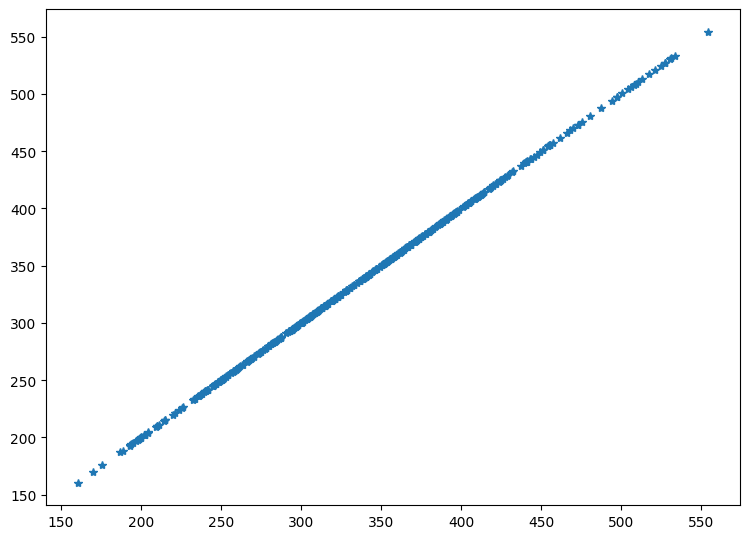

In [95]:
showSaccades()

(196, 4) (196, 1)


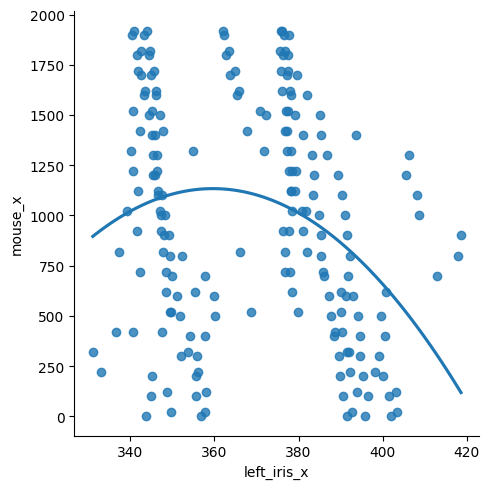

In [100]:
# Test

x_train = dataset_t.drop(['timestamp', 'mouse_x', 'mouse_y'], axis=1)
y_train = dataset_t.mouse_x.values.reshape(-1, 1)

print(x_train.shape, y_train.shape)

sns.lmplot(x ="left_iris_x", y ="mouse_x", data = dataset_t, order = 2, ci = None)
plt.show()


In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 1000)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))


0.42687598996186726


In [81]:
model_left_x = linear_model.LinearRegression()
model_left_x.fit(x_train, y_train)
model_left_x.score(x_train, y_train)


0.6115816599928297